In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

In [3]:
# Pythong reading and plotting module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Performing data transformation
from sklearn import preprocessing


# performing the feature selection by PCA. SelectKBest module
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# importing pipeline Class
from sklearn.pipeline import Pipeline

# Cross Validation Module
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

#### **Reading the database:** Malware Multiclass datasets

In [4]:
df = pd.read_csv('malware_MultiClass.csv')

# print out and display dataframe as tables in HTML
display(HTML(df.head(5).to_html()))

,hash,millisecond,classification,os,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,0,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,1,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,2,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,3,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,4,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [5]:
print(f'Size of the database : {df.shape}')

Size of the database : (100000, 36)


### Detecting Missing Values (null) values in any columns

In [6]:
print('Feature             null /Samples    Unique_Values      DataType')
print("*"*50)
for name in df.columns:
    print(f'{name:20} : {df[name].isna().sum()}/{df.shape[0]}     :   {df[name].nunique():5}     :   {df[name].dtypes}')

Feature             null /Samples    Unique_Values      DataType
**************************************************
hash                 : 0/100000     :     100     :   object
millisecond          : 0/100000     :    1000     :   int64
classification       : 0/100000     :       3     :   object
os                   : 0/100000     :       5     :   object
state                : 0/100000     :     304     :   int64
usage_counter        : 0/100000     :       1     :   int64
prio                 : 0/100000     :      85     :   int64
static_prio          : 0/100000     :     271     :   int64
normal_prio          : 0/100000     :       1     :   int64
policy               : 0/100000     :       1     :   int64
vm_pgoff             : 0/100000     :       1     :   int64
vm_truncate_count    : 0/100000     :    2813     :   int64
task_size            : 0/100000     :       1     :   int64
cached_hole_size     : 0/100000     :       1     :   int64
free_area_cache      : 0/100000     :    

In [7]:
# removning missing value if found
df.dropna(inplace=True)

<span style="color:blue"> **In the above list, many columns have only one unique value. So we can definitely remove those columns for classifications.** </span>.
    
    - usage_counter
    - normal_prio
    - policy
    - vm_pgoff
    - task_size
    - cached_hole_size
    - hiwater_rss
    - nr_ptes
    - lock
    - cgtime
    - signal_nvcsw                                                                                                       
                                                                                                        

<span style="color:blue"> **In the column list, hash and milliseconds has no meaning related to the data. So we can definitely remove those columns for classifications.** </span>

    - hash
    - millisecond

In [8]:
df.drop(['hash','millisecond' ],axis=1,inplace=True) 

In [9]:
print(f'Number of Columns after dropping same value columns: {df.shape[1]}')
print('Feature        DataType')
print("*"*50)
for name in df.columns:
    print(f'{name:20} :  {df[name].dtypes}')

Number of Columns after dropping same value columns: 34
Feature        DataType
**************************************************
classification       :  object
os                   :  object
state                :  int64
usage_counter        :  int64
prio                 :  int64
static_prio          :  int64
normal_prio          :  int64
policy               :  int64
vm_pgoff             :  int64
vm_truncate_count    :  int64
task_size            :  int64
cached_hole_size     :  int64
free_area_cache      :  int64
mm_users             :  int64
map_count            :  int64
hiwater_rss          :  int64
total_vm             :  int64
shared_vm            :  int64
exec_vm              :  int64
reserved_vm          :  int64
nr_ptes              :  int64
end_data             :  int64
last_interval        :  int64
nvcsw                :  int64
nivcsw               :  int64
min_flt              :  int64
maj_flt              :  int64
fs_excl_counter      :  int64
lock                 :  int

### Data Processing and Transform for categorical indepenedent  variables

In [10]:
# copy the data frame
ndf = df.copy(deep=True)

In [11]:
# Converting os categorical variable as one hot encoding with get_dummies
o =  pd.get_dummies(ndf['os'])
ndf = pd.concat([ndf, o],axis=1)

In [12]:
ndf.drop(['os'], axis=1,inplace=True)

### Performing Label endcoding for classification

In [13]:
# encode labels for 
le = preprocessing.LabelEncoder()
z = ndf['classification'] 
le.fit(z)
z_encoded = le.transform(z)
ndf['classification'] = z_encoded

In [14]:
# print out and display dataframe as tables in HTML
display(HTML(ndf.head(5).to_html()))

,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,CentOS,Debian,Mac,Ubuntu,Windows
0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0,True,False,False,False,False
1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0,False,False,False,False,True
2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0,False,False,True,False,False
3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0,False,False,False,True,False
4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0,False,False,True,False,False


In [21]:
ndf.shape

(100000, 38)

Text(0.5, 1.0, 'Multi class statuses of 100000 Observations')

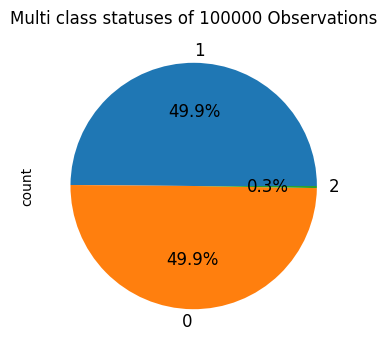

In [15]:
axes = ndf.classification.value_counts().plot.pie(autopct='%1.1f%%', fontsize=12, figsize=(4,4))
axes.set_title("Multi class statuses of {} Observations".format(ndf.shape[0]), fontsize=12)

There are three class presents :

    - 0 : Maleware : 49871
    - 1 : Benign   : 49858
    - 2 : unknown  : 271

### Assigning the independent variables as feature vector X and dependent variable as Y 'classification'

In [16]:
X = ndf.drop(['classification'],axis=1)
y = ndf['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
# Buiding Logistic Regression Model with OneVsRest Classifier and OneVsOneClassifier
clf = LogisticRegression(solver='liblinear')

In [93]:
parameters = {
 'C': [0.001, 0.01, 0.1, 1, 10],
 'max_iter': [100, 200, 300],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [94]:
# Get the best parameters and estimator
print(f'Best Parameter : {grid_search.best_params_}')
print(f'Estimator model = {grid_search.best_estimator_}')

Best Parameter : {'C': 0.1, 'max_iter': 100}
Estimator model = LogisticRegression(C=0.1, solver='liblinear')


In [18]:
# performing cross validation with 5 fold 
cv = KFold(n_splits=5, shuffle=True, random_state=12)

In [19]:
logisticmodel = LogisticRegression(C=0.1,solver='liblinear')

In [97]:
#help(LogisticRegression)

## 1. Model Building using All features with Logistic Regression

In [20]:
print(f'Logistic Regression Model with All features:')

accuracy = cross_val_score(logisticmodel, X, y, cv=cv, scoring='accuracy')
f1score = cross_val_score(logisticmodel, X, y, cv=cv, scoring='f1_weighted')
ovr = cross_val_score(logisticmodel, X, y, cv=cv, scoring='roc_auc_ovr_weighted')
ovo = cross_val_score(logisticmodel, X, y, cv=cv, scoring='roc_auc_ovo_weighted')
print(f'\tAccuracy  : {accuracy.mean():0.3f}')
print(f'\tF1-Score  : {f1score.mean():0.3f}')
print(f'\tAUC_Score for OVR : {ovr.mean():0.3f}')
print(f'\tAUC_Score for OVO : {ovo.mean():0.3f}')

Logistic Regression Model with All features:
	Accuracy  : 0.712
	F1-Score  : 0.709
	AUC_Score for OVR : 0.803
	AUC_Score for OVO : 0.704


## 2. Model Building using one Feature selection Logisitic Regression

In [23]:
# using k_best_selector using f_classif annova scoring function
kselector = SelectKBest(f_classif, k=12) # tried varying k value, and got height F1 score at k=12
Xselected = kselector.fit_transform(X, y)

In [24]:
print(f'Logistic Regression with one feature selection:')

accuracy = cross_val_score(logisticmodel, Xselected, y, cv=cv, scoring='accuracy')
f1score = cross_val_score(logisticmodel, Xselected, y, cv=cv, scoring='f1_weighted')
ovr = cross_val_score(logisticmodel, Xselected, y, cv=cv, scoring='roc_auc_ovr_weighted')
ovo = cross_val_score(logisticmodel, Xselected, y, cv=cv, scoring='roc_auc_ovo_weighted')
print(f'\tAccuracy  : {accuracy.mean():0.3f}')
print(f'\tF1-Score  : {f1score.mean():0.3f}')
print(f'\tAUC_Score for OVR : {ovr.mean():0.3f}')
print(f'\tAUC_Score for OVO : {ovo.mean():0.3f}')

Logistic Regression with one feature selection:
	Accuracy  : 0.847
	F1-Score  : 0.846
	AUC_Score for OVR : 0.894
	AUC_Score for OVO : 0.794


## 3. Model Building using PCA with Logisitic Regression

In [26]:
model =  Pipeline([('Scaling', preprocessing.StandardScaler()),('PCA', PCA(n_components=12)), ('Logistic Regression', logisticmodel)])

In [27]:
print(f'Logistic Regression with PCA :')

accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
f1score = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
ovr = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr_weighted')
ovo = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovo_weighted')
print(f'\tAccuracy  : {accuracy.mean():0.3f}')
print(f'\tF1-Score  : {f1score.mean():0.3f}')
print(f'\tAUC_Score for OVR : {ovr.mean():0.3f}')
print(f'\tAUC_Score for OVO : {ovo.mean():0.3f}')

Logistic Regression with PCA :
	Accuracy  : 0.864
	F1-Score  : 0.863
	AUC_Score for OVR : 0.934
	AUC_Score for OVO : 0.837


## **Conclusion**

**In this homework, I have built the model with three different ways :**

    - all features
    - select k features by using one feature selection method
    - using Principal Component Analysis (PCA)

I have built a Logistic Regression classifier with a 'liblinear' kernel with C=0.1, which OneVsRest Classifier uses for multi-class classification and OneVsOneClassifier for Multi-class classification. By utilizing the PCA approach with Dimension Reduction and got the highest Accuracy as (86.4%) and F1_weighted_Score (86.3) and AUC score Score as for OVR (93.1%) and OVO (83.7%).